# 4종목
포스코 홀딩스, 팬오션, 태광산업, 아이에스동서

```
PER과 PBR이 동종산업대비 낮고, 3개년 영업이익이 꾸준히 증가한 기업!
```

## 임포트 모듈

In [ ]:
!pip install statsmodels

In [ ]:
!pip install mplfinance

     |████████████████████████████████| 70 kB 3.0 MB/s 


In [ ]:
!pip install finance-datareader

     |████████████████████████████████| 48 kB 2.0 MB/s 


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 43.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (23.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and di

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA

import seaborn as sns
import os

import pandas_datareader.data as web
import mplfinance as mpf

In [ ]:
from bs4 import BeautifulSoup
import csv
import os
import re
import requests

In [ ]:
import FinanceDataReader as fdr

In [ ]:
from pmdarima.arima import ndiffs
import pmdarima as pm
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
#그래프 한글띄우기
import pandas as pd
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

## 크롤링
2019 기준 kospi200

In [ ]:
from bs4 import BeautifulSoup
import requests

BaseUrl = ' http://finance.naver.com/sise/entryJongmok.nhn?&page='

for i in range(1, 21):
    url = BaseUrl + str(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'lxml')
    items = soup.find_all('td', {'class': 'ctg'})

    for item in items:
        #print(item)
        txt = item.a.get('href') # https://finance.naver.com/item/main.nhn?code=006390
        k = re.search('[\d]+', txt) ##정규표현식 사용. [\d] 숫자표현, + : 반복
        if k:
            code = k.group()
            name = item.text
            data = code, name

            with open ('KOSPI200.csv', 'a', newline='') as f: ## with 블록안에서 open, 블록밖에서 자동으로 close.
                writer = csv.writer(f)
                writer.writerow(data)

In [ ]:
# 코드, 종목 csv 파일 저장
KOSPI_200 = pd.read_csv("KOSPI200.csv", names=["code","name"],converters={'code':str})
KOSPI_200

,code,name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,035420,NAVER
...,...,...
295,000070,삼양홀딩스
296,057050,현대홈쇼핑
297,064960,SNT모티브
298,192400,쿠쿠홀딩스


### code, name 정리

In [ ]:
# code list로 변환
code = KOSPI_200['code']
code=code.values
code

array(['005930', '373220', '000660', '207940', '035420', '035720',
       '005380', '006400', '051910', '000270', '005490', '105560',
       '068270', '323410', '055550', '028260', '012330', '377300',
       '066570', '096770', '034730', '015760', '086790', '011200',
       '051900', '259960', '032830', '352820', '009150', '034020',
       '017670', '302440', '003550', '033780', '316140', '010950',
       '010130', '003490', '329180', '018260', '036570', '000810',
       '251270', '090430', '003670', '011070', '030200', '361610',
       '024110', '402340', '034220', '086280', '326030', '011170',
       '009830', '018880', '009540', '032640', '035250', '097950',
       '011790', '004020', '000720', '006800', '028050', '138040',
       '010140', '021240', '005830', '011780', '008560', '000100',
       '071050', '161390', '267250', '020150', '180640', '047810',
       '003410', '078930', '006360', '241560', '139480', '005940',
       '016360', '029780', '002790', '028670', '036460', '2715

In [ ]:
# name list로 변환
name = KOSPI_200['name']
name = name.values
name

array(['삼성전자', 'LG에너지솔루션', 'SK하이닉스', '삼성바이오로직스', 'NAVER', '카카오', '현대차',
       '삼성SDI', 'LG화학', '기아', 'POSCO홀딩스', 'KB금융', '셀트리온', '카카오뱅크', '신한지주',
       '삼성물산', '현대모비스', '카카오페이', 'LG전자', 'SK이노베이션', 'SK', '한국전력',
       '하나금융지주', 'HMM', 'LG생활건강', '크래프톤', '삼성생명', '하이브', '삼성전기', '두산중공업',
       'SK텔레콤', 'SK바이오사이언스', 'LG', 'KT&G', '우리금융지주', 'S-Oil', '고려아연',
       '대한항공', '현대중공업', '삼성에스디에스', '엔씨소프트', '삼성화재', '넷마블', '아모레퍼시픽',
       '포스코케미칼', 'LG이노텍', 'KT', 'SK아이이테크놀로지', '기업은행', 'SK스퀘어', 'LG디스플레이',
       '현대글로비스', 'SK바이오팜', '롯데케미칼', '한화솔루션', '한온시스템', '한국조선해양', 'LG유플러스',
       '강원랜드', 'CJ제일제당', 'SKC', '현대제철', '현대건설', '미래에셋증권', '삼성엔지니어링',
       '메리츠금융지주', '삼성중공업', '코웨이', 'DB손해보험', '금호석유', '메리츠증권', '유한양행',
       '한국금융지주', '한국타이어앤테크놀로지', '현대중공업지주', '일진머티리얼즈', '한진칼', '한국항공우주',
       '쌍용C&E', 'GS', 'GS건설', '두산밥캣', '이마트', 'NH투자증권', '삼성증권', '삼성카드',
       '아모레G', '팬오션', '한국가스공사', '오리온', '롯데지주', 'DB하이텍', '한미약품', '호텔신라',
       '한전기술', '한화시스템', '현대미포조선', '한미사이언스', 'KCC', 'BGF리테일', '삼성전자',
     

In [ ]:
sample = []
for c, n in zip(code, name):
  sample.append([c, n])

In [ ]:
sample

In [ ]:
len(sample)

# 포스코 홀딩스
005490

In [ ]:
KOSPI_200.loc[KOSPI_200['name']=='POSCO홀딩스']

,code,name
10,005490,POSCO홀딩스
110,005490,POSCO홀딩스


In [ ]:
POSCO_홀딩스 = fdr.DataReader('005490', '2019-01-02', '2021-12-31')['Close']
POSCO_홀딩스

Date
2019-01-02    237000
2019-01-03    237000
2019-01-04    239000
2019-01-07    246000
2019-01-08    245500
               ...  
2021-12-24    284000
2021-12-27    281500
2021-12-28    283500
2021-12-29    279000
2021-12-30    274500
Name: Close, Length: 742, dtype: int64

#### 시각화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


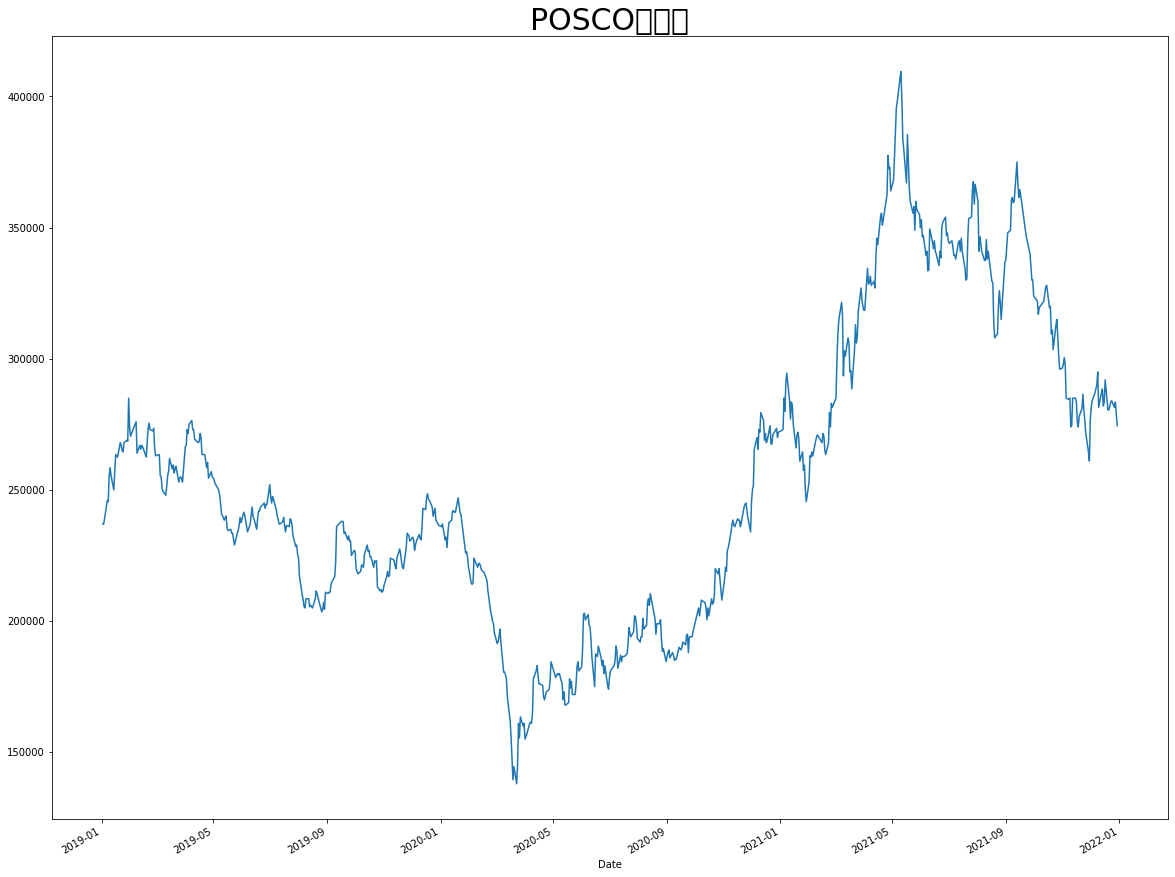

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,16))
plt.title("POSCO홀딩스", fontsize =30)
POSCO_홀딩스.plot()

#### 데이터 나누기
train, test 8:2

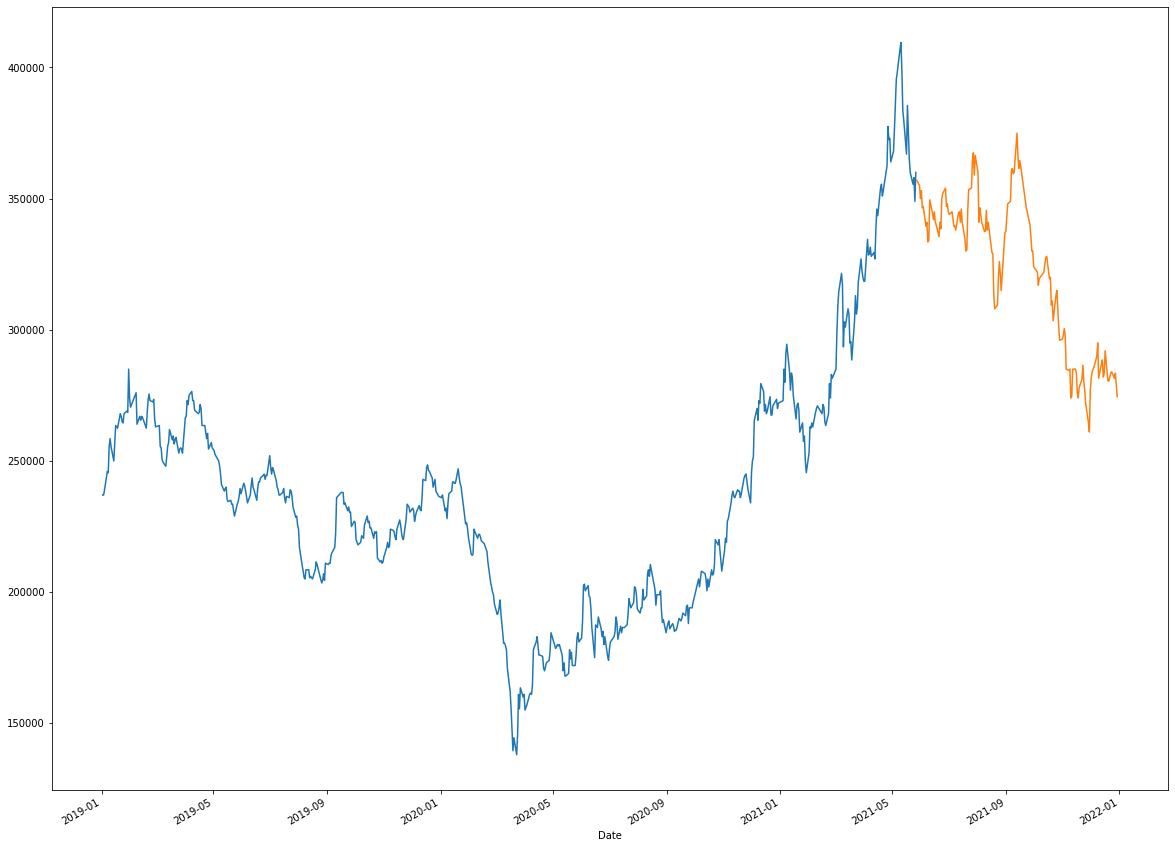

In [ ]:
# train, test 데이터 나누기
y_train = POSCO_홀딩스[:int(0.8*len(POSCO_홀딩스))]
y_test = POSCO_홀딩스[int(0.8*len(POSCO_홀딩스)):]
plt.figure(figsize=(20,16))
y_train.plot()
y_test.plot()

#### 차분


In [ ]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


#### ARIMA 모형 적합

In [ ]:
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11775.317, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11777.312, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11777.320, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11774.327, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11779.318, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.381 seconds


#### 잔차 검정

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  593
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5886.164
Date:                Wed, 30 Mar 2022   AIC                          11774.327
Time:                        07:42:37   BIC                          11778.711
Sample:                             0   HQIC                         11776.035
                                - 593                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       2.53e+07   1.01e+06     25.123      0.000    2.33e+07    2.73e+07
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               126.16
Prob(Q):                              0.93   Pr

#### 모형 refresh 및 예측

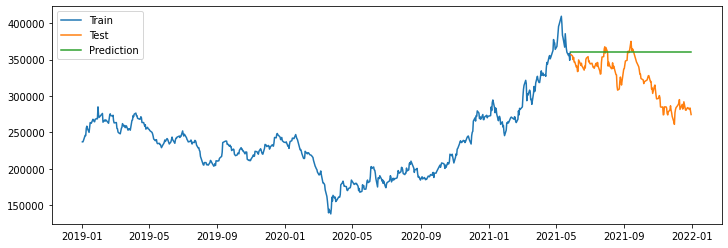

In [ ]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [ ]:
y_predict

,Prediction
Date,
2021-05-28,360000.0
2021-05-31,360000.0
2021-06-01,360000.0
2021-06-02,360000.0
2021-06-03,360000.0
...,...
2021-12-24,360000.0
2021-12-27,360000.0
2021-12-28,360000.0


In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [ ]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [ ]:
pd.DataFrame({"test": y_test, "pred": y_pred})

#### 잘 적합됐는지 시각화

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(0,1,0)모형")
fig.show()

#### 모델 평가
MAPE

In [ ]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")

# 팬오션
028670

In [ ]:
KOSPI_200.loc[KOSPI_200['name']=='팬오션']

In [ ]:
팬오션 = fdr.DataReader('028670', '2019-01-02', '2021-12-31')['Close']
팬오션

#### 시각화

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,16))
plt.title("팬오션", fontsize =30)
팬오션.plot()

#### 데이터 나누기
train, test 8:2

In [ ]:
# train, test 데이터 나누기
y_train = 팬오션[:int(0.8*len(팬오션))]
y_test = 팬오션[int(0.8*len(팬오션)):]
plt.figure(figsize=(20,16))
y_train.plot()
y_test.plot()

#### 차분


In [ ]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

#### ARIMA 모형 적합

In [ ]:
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

#### 잔차 검정

In [ ]:
print(model.summary())

#### 모형 refresh 및 예측

In [ ]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [ ]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [ ]:
pd.DataFrame({"test": y_test, "pred": y_pred})

#### 잘 적합됐는지 시각화

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(1,1,0)모형")
fig.show()

#### 모델 평가
MAPE

In [ ]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")

# 태광산업
003240

In [ ]:
KOSPI_200.loc[KOSPI_200['name']=='태광산업']

In [ ]:
태광산업 = fdr.DataReader('003240', '2019-01-02', '2021-12-31')['Close']
태광산업

#### 시각화

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,16))
plt.title("태광산업", fontsize =30)
태광산업.plot()

#### 데이터 나누기
train, test 8:2

In [ ]:
# train, test 데이터 나누기
y_train = 태광산업[:int(0.8*len(태광산업))]
y_test = 태광산업[int(0.8*len(태광산업)):]
plt.figure(figsize=(20,16))
y_train.plot()
y_test.plot()

#### 차분


In [ ]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

#### ARIMA 모형 적합

In [ ]:
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

#### 잔차 검정

In [ ]:
print(model.summary())

#### 모형 refresh 및 예측

In [ ]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [ ]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [ ]:
pd.DataFrame({"test": y_test, "pred": y_pred})

#### 잘 적합됐는지 시각화

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(0,1,0)모형")
fig.show()

#### 모델 평가
MAPE

In [ ]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")

# 아이에스동서
010780

In [ ]:
KOSPI_200.loc[KOSPI_200['name']=='아이에스동서']

In [ ]:
아이에스동서 = fdr.DataReader('010780', '2019-01-02', '2021-12-31')['Close']
아이에스동서

#### 시각화

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,16))
plt.title("아이에스동서", fontsize =30)
아이에스동서.plot()

#### 데이터 나누기
train, test 8:2

In [ ]:
# train, test 데이터 나누기
y_train = 아이에스동서[:int(0.8*len(아이에스동서))]
y_test = 아이에스동서[int(0.8*len(아이에스동서)):]
plt.figure(figsize=(20,16))
y_train.plot()
y_test.plot()

#### 차분


In [ ]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

#### ARIMA 모형 적합

In [ ]:
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

#### 잔차 검정

In [ ]:
print(model.summary())

#### 모형 refresh 및 예측

In [ ]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [ ]:
y_predict

In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [ ]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [ ]:
pd.DataFrame({"test": y_test, "pred": y_pred})

,test,pred
Date,,
2021-05-28,61000,60300.0
2021-05-31,60000,61000.0
2021-06-01,60700,60000.0
2021-06-02,59700,60700.0
2021-06-03,59100,59700.0
...,...,...
2021-12-24,43700,42550.0
2021-12-27,44500,43700.0
2021-12-28,44100,44500.0


#### 잘 적합됐는지 시각화

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(0,1,0)모형")
fig.show()

#### 모델 평가
MAPE

In [ ]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")

MAPE: 1.458
